 Please run the JSON creators found in PreProcessing folder or download an example by runnnig the commeted code below

In [1]:
# from google_drive_downloader import GoogleDriveDownloader as gdd
# gdd.download_file_from_google_drive(file_id='1lDGIkS7QDy7mUDStDtb_fhMR5euF2R6v',dest_path='../resources/icepoints2019-02-08.json')
# gdd.download_file_from_google_drive(file_id='1qgePy_WsVN924fdJhnvcMpqCCRfvUC9i',dest_path='../resources/currentPoints.json')

In [2]:
import pandas as pd
from RoutePlanner.CellGrid import CellGrid

#read in Ice  & Currents Points
icePoints     = pd.read_json('../resources/icepoints2019-02-08.json')
icePoints     = pd.DataFrame.from_records(icePoints.icepoints)
currentPoints = pd.read_json('../resources/currentPoints.json')
currentPoints = pd.DataFrame.from_records(currentPoints.currentPoints)

longMin    = 230
longMax    = 360
latMin     = -75
latMax     = -40
cellWidth  = 5
cellHeight = 2.5

cellGrid = CellGrid(longMin, longMax, latMin, latMax, cellWidth, cellHeight)
cellGrid.addIcePoints(icePoints)
cellGrid.addCurrentPoints(currentPoints)

In [3]:
from RoutePlanner.Optimisation import TravelTime
OptInfo = {}
OptInfo['WayPoints']            = pd.read_csv('../resources/WayPoints_TestExample2.csv') 
OptInfo['MaxIceExtent']         = 0.8
OptInfo['VehicleInfo']          = {}
OptInfo['VehicleInfo']['Speed'] = 26.3 #Units km/hr
TT = TravelTime(cellGrid,OptInfo,zerocurrents=True)
TT.Dijkstra(verbrose=True)

=== Processing Waypoint = Falklands ===
=== Processing Waypoint = SouthGeorgia ===


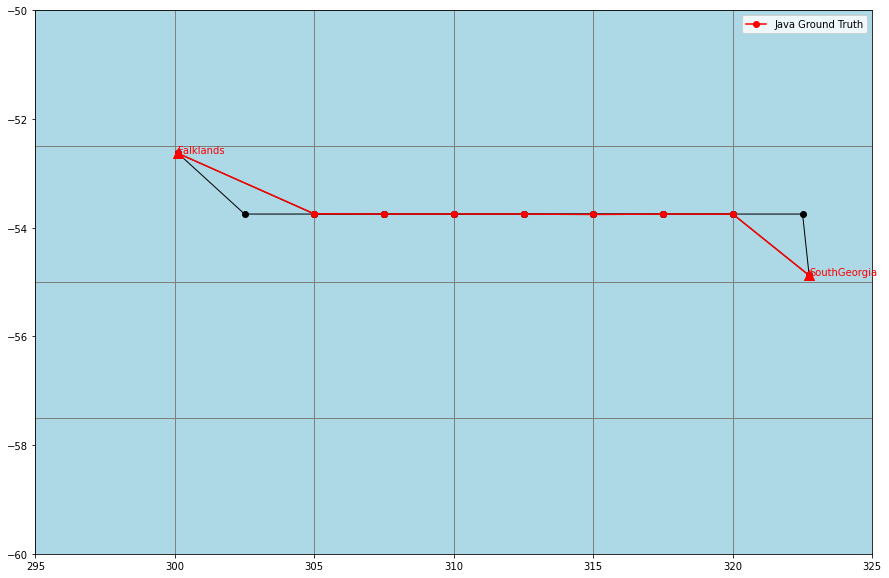

In [4]:
#Plotting the python paths
ax = TT.PlotPaths(routepoints=True)

# Loading Ground Truth & Comparison
GT = pd.read_csv('../resources/GroundTruth_FalklandsSouthGeorgia.csv')
GT['Long'] = GT['Long']+360

ax.plot(GT['Long'],GT['Lat'],'r',label='Java Ground Truth',marker='o')


ax.set_xlim([295,325])
ax.set_ylim([-60,-50])
ax.legend()